In [ ]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data Import (Entry Point)

In [ ]:
df = pd.read_excel("Socail Buzz dataset.xlsx")
df.head()

,,Content ID,Type,Datetime,reaction Name,Content_Type,Content_Category,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,photo,Studying,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,photo,Studying,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,negative,photo,Studying,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,photo,Studying,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,positive,photo,Studying,30


In [ ]:
df['Content ID'].value_counts().head(10)

,count
Content ID,
f3e9785c-d4e0-4258-a876-4d58ddb38790,48
81abd65a-3b76-4574-a0a7-db6bf7184ae2,48
451b228b-9d66-45a4-b6fa-46c502562b5f,48
4dd4da35-453e-466d-95ca-b1a7710fac1f,48
dcaa5091-1246-4d3c-aed8-dcd8e1da69cc,48
daeddfcc-c030-4674-8317-56a23ab81799,48
67766c84-7d8d-46e2-b2e8-8b0f8dc27193,48
4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,48
e61a1b04-17e4-4918-a637-ebfc59783ad0,48


# 2. **Problem Framing & Analysis Logic**

## 2.1: User Behavior Quick View
Understand what these users did and what their behavior distribution looks like

#### Q1：What is the data distribution like?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0                     24573 non-null  int64         
 1   Content ID        24573 non-null  object        
 2   Type              24573 non-null  object        
 3   Datetime          24573 non-null  datetime64[ns]
 4   reaction Name     24573 non-null  object        
 5   Content_Type      24573 non-null  object        
 6   Content_Category  24573 non-null  object        
 7   Score             24573 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
# Determine whether any popular content has been scored repeatedly
df.groupby('Content ID').count()

,,Type,Datetime,reaction Name,Content_Type,Content_Category,Score
Content ID,,,,,,,
004e820e-49c3-4ba2-9d02-62db0065410c,1,1,1,1,1,1,1
00d0cdf9-5919-4102-bf84-ebde253c3cd2,46,46,46,46,46,46,46
01396602-c759-4a17-90f0-8f9b3ca11b30,40,40,40,40,40,40,40
019b61f4-926c-438e-adaf-6119c5eab752,13,13,13,13,13,13,13
01ab84dd-6364-4236-abbb-3f237db77180,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
fdca8d15-966b-4825-8133-1fafc5c1f9fc,27,27,27,27,27,27,27
fe06b730-b1f8-4f55-af1a-52487d8f1ec6,25,25,25,25,25,25,25
fea8d77c-fd0b-4678-868f-fbae567642f3,6,6,6,6,6,6,6


In [ ]:
# See which content/types appear most frequently
df['Content_Type'].value_counts()

,count
Content_Type,
photo,6589
video,6245
GIF,6079
audio,5660


In [ ]:
# View global score fluctuations
df.describe()

,,Datetime,Score
count,24573.000000,24573,24573.000000
mean,12774.614821,2020-12-17 06:35:24.454278912,39.622553
min,1.000000,2020-06-18 08:07:22,0.000000
25%,6383.000000,2020-09-16 18:51:38,15.000000
50%,12775.000000,2020-12-17 06:08:30,35.000000
75%,19168.000000,2021-03-17 12:05:06,65.000000
max,25552.000000,2021-06-18 08:30:29,75.000000
std,7379.314372,NaN,26.043011


The Score above shows large standiviation(26.04) indicated the data is unstable

In [ ]:
# check the proportion of keywords and reaction
df.value_counts(normalize=True)

,,,,,,,,proportion
,Content ID,Type,Datetime,reaction Name,Content_Type,Content_Category,Score,
25552,75d6b589-7fae-4a6d-b0d0-752845150e56,cherish,2021-01-04 04:55:11,positive,audio,technology,70,0.000041
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,photo,Studying,0,0.000041
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,photo,Studying,10,0.000041
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,negative,photo,Studying,15,0.000041
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,photo,Studying,0,0.000041
...,...,...,...,...,...,...,...,...
18,97522e57-d9ab-4bd6-97bf-c24d952602d2,indifferent,2021-02-24 11:37:57,neutral,photo,Studying,20,0.000041
17,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-09-23 06:24:11,neutral,photo,Studying,35,0.000041
16,97522e57-d9ab-4bd6-97bf-c24d952602d2,super love,2021-02-24 05:09:23,positive,photo,Studying,75,0.000041


In [ ]:
# Statistics of behavior volume by day (hot period)
df.groupby('Datetime')

In [ ]:
df['Datetime'].min(),df['Datetime'].max()

(Timestamp('2020-06-18 08:07:22'), Timestamp('2021-06-18 08:30:29'))

* clean data



In [ ]:
# Checking for null values
df.isnull().sum()
# Remove missing values: prevent null values ​​from affecting the distribution

,0
,0
Content ID,0
Type,0
Datetime,0
reaction Name,0
Content_Type,0
Content_Category,0
Score,0


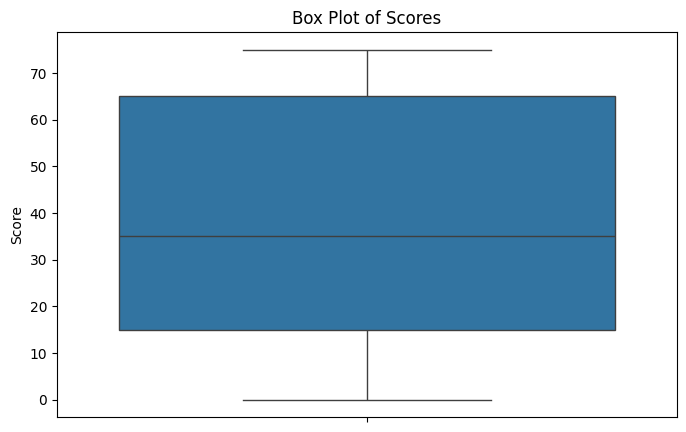

In [ ]:
# Check anomaly scores
#df = df[df['Score'].between(0, 75)]
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Score')  # Raw behavior layer score outlier detection
plt.title('Box Plot of Scores')
plt.show()

In [ ]:
# Clean keyword formats and unify analysis dimensions
df['Type'] = df['Type'].str.lower().str.strip()
df['Content_Category'] = df['Content_Category'].str.lower().str.strip()

In [ ]:
# Check and remove duplicate values ​
df.duplicated().sum()
# df = df.drop_duplicates() #

np.int64(0)

#### Q2：How does user behavior behave?

##### Time hotspots (peak user behavior)


Purpose: To find the time period when users are most active in interaction (possibly a content explosion point)

###### Q： Which time periods are the most active for user interaction (possibly content explosion points)?

/tmp/ipython-input-18-1818705602.py:13: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(date, value, 'ro')  # 红点


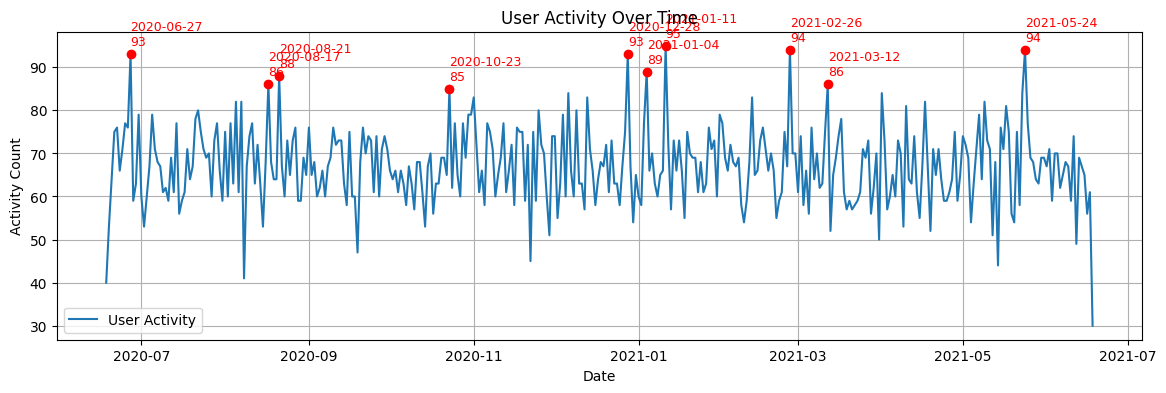

Datetime
2021-01-11    95
2021-02-26    94
2021-05-24    94
2020-06-27    93
2020-12-28    93
2021-01-04    89
2020-08-21    88
2020-08-17    86
2021-03-12    86
2020-10-23    85
dtype: int64


In [ ]:

# Get daily activity
daily_activity = df.groupby(df['Datetime'].dt.date).size()

# Find the top 10 peaks
top_peaks = daily_activity.nlargest(10)


plt.figure(figsize=(14, 4))
daily_activity.plot(kind='line', label='User Activity')

# label
for date, value in top_peaks.items():
    plt.plot(date, value, 'ro')  # red spot
    plt.text(date, value + 2, f'{date}\n{value}', fontsize=9, color='red')

plt.title('User Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Activity Count')
plt.grid(True)
plt.legend()
plt.show()
print(top_peaks)

###### Q：Which posts are high-quality hot topics?


In [ ]:
# Filter out all content on these peak days（Content ID）
df['date'] = df['Datetime'].dt.date  # Convert timestamp to date format
high_peaks = ['2021-01-11','2021-02-26','2021-05-24','2020-06-27','2020-12-28','2021-01-04','2020-08-21','2020-08-17','2021-03-12','2020-10-23'] # Select peak value
df_high_peak_time = df[df['date'].isin(pd.to_datetime(high_peaks).date)] # Creating a Peak Database

# Identifying content preferences during peak periods of user behavior
df_high_peak_time.groupby('Content_Category')['Score'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)# keyword distribution（ Content_Category or reaction Name）



# Evaluate the scoring potential of the content category itself:
overall_mean = df['Score'].mean() # The average score of all original data sets
category_score = df.groupby('Content_Category')['Score'].mean().reset_index() # Group by content_category and calculate the average score of each group
category_score['% Above Average'] = (category_score['Score'] / overall_mean - 1) * 100 # Compare the score of each keyword to the overall average and calculate the improvement
category_score.sort_values(by='% Above Average', ascending=False).head(10)


,Content_Category,Score,% Above Average
12,technology,40.481743,2.168437
8,public speaking,40.479869,2.163705
7,healthy eating,40.383809,1.921269
4,education,40.080949,1.156906
11,studying,39.815847,0.487839
15,veganism,39.758814,0.343897
2,culture,39.724940,0.258406
10,soccer,39.658888,0.091703
5,fitness,39.658065,0.089624
9,science,39.625835,0.008283


In [ ]:
# peak keyword frequency
high_peak_freq = df_high_peak_time['Content_Category'].value_counts().reset_index()
high_peak_freq.columns = ['Content_Category', 'High_Peak_Count']

# Combined global score and peak frequency
merged_df = pd.merge(
    category_score,
    high_peak_freq,
    on='Content_Category',
    how='left'
)
merged_df.sort_values(by='% Above Average', ascending=False)

,Content_Category,Score,% Above Average,High_Peak_Count
12,technology,40.481743,2.168437,74
8,public speaking,40.479869,2.163705,52
7,healthy eating,40.383809,1.921269,49
4,education,40.080949,1.156906,63
11,studying,39.815847,0.487839,42
15,veganism,39.758814,0.343897,41
2,culture,39.724940,0.258406,59
10,soccer,39.658888,0.091703,57
5,fitness,39.658065,0.089624,43
9,science,39.625835,0.008283,69


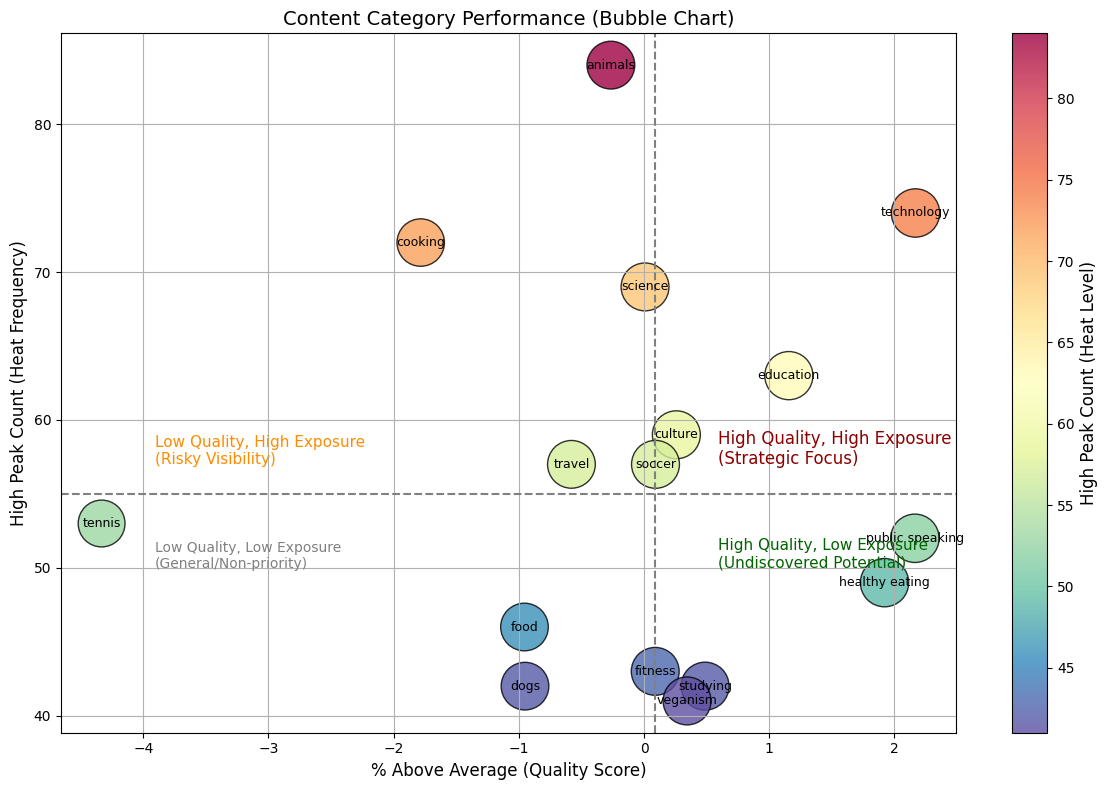

In [ ]:
x_median = merged_df['% Above Average'].median()
y_median = merged_df['High_Peak_Count'].median()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    data=merged_df,
    x='% Above Average',
    y='High_Peak_Count',
    s=merged_df['Score'] * 30,
    c=merged_df['High_Peak_Count'],
    cmap='Spectral_r',
    alpha=0.8,
    edgecolors='k'
)

# adding label
for _, row in merged_df.iterrows():
    plt.text(row['% Above Average'], row['High_Peak_Count'], row['Content_Category'],
             fontsize=9, ha='center', va='center')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('High Peak Count (Heat Level)', fontsize=12)

# Adding average reference lines
plt.axvline(x_median, color='gray', linestyle='--')
plt.axhline(y_median, color='gray', linestyle='--')

# adding label
plt.text(x_median + 0.5, y_median + 2, 'High Quality, High Exposure\n(Strategic Focus)', color='darkred', fontsize=12)
plt.text(x_median - 4, y_median + 2, 'Low Quality, High Exposure\n(Risky Visibility)', color='darkorange', fontsize=11)
plt.text(x_median + 0.5, y_median - 5, 'High Quality, Low Exposure\n(Undiscovered Potential)', color='darkgreen', fontsize=11)
plt.text(x_median - 4, y_median - 5, 'Low Quality, Low Exposure\n(General/Non-priority)', color='gray', fontsize=10)


plt.xlabel('% Above Average (Quality Score)', fontsize=12)
plt.ylabel('High Peak Count (Heat Frequency)', fontsize=12)
plt.title('Content Category Performance (Bubble Chart)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Key Findings

* Peak Frequency Analysis (by month across years):
  * January shows recurring peaks across multiple years (e.g., 2 times), suggesting a structural seasonal effect.

  * Other months only show one-off peaks, indicating annual irregularities rather than stable patterns.

  * Content Themes During Peaks:

  * January peaks are strongly linked to holidays, with content categories mainly around Cooking and Technology, both showing a predominantly positive sentiment.

Recommendations

* Focus on high-quality, high-engagement clusters such as Technology and Education.
*	Revitalize undervalued but high-quality niches, e.g., Public Speaking and Healthy Eating, which have growth potential but are currently under-leveraged.
*	Manage risk exposure by carefully controlling traffic allocation to high-volume but low-quality content, in order to prevent audience fatigue and resource overspending.




##### Score Distribution Heatmap



Text(0.5, 1.0, 'Score Distribution - Raw Behavior Layer')

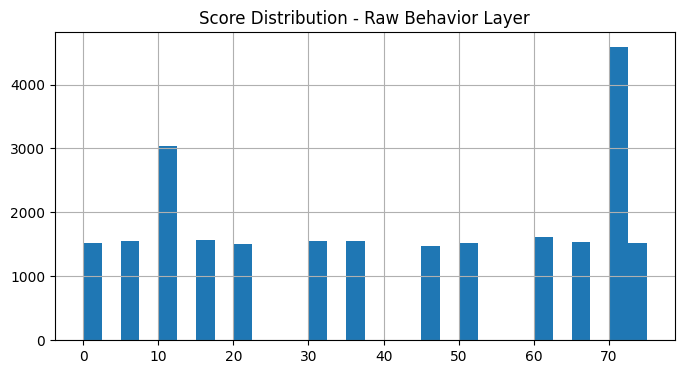

In [ ]:
df['Score'].hist(bins=30, figsize=(8, 4))
plt.title('Score Distribution - Raw Behavior Layer')

##### Keyword Hot Zones



###### Q：Which categories are active?

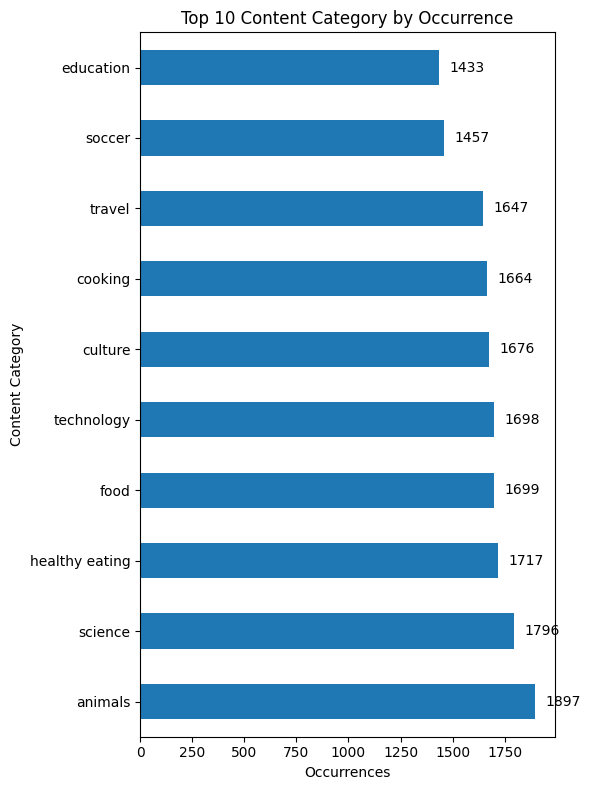

In [ ]:
# Keyword frequency
top_keywords = df['Content_Category'].value_counts().head(10)

import matplotlib.pyplot as plt

# create picture
ax = top_keywords.plot(kind='barh', figsize=(6, 8), title='Top 10 Content Category by Occurrence')

# setting axis
plt.xlabel('Occurrences')
plt.ylabel('Content Category')

# labeling
for i, v in enumerate(top_keywords.values):
    ax.text(v + 50, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

In [ ]:
keyword_score = df.groupby('Content_Category')['Score'].mean().sort_values(ascending=False).head(10)
keyword_score

,Score
Content_Category,
technology,40.481743
public speaking,40.479869
healthy eating,40.383809
education,40.080949
studying,39.815847
veganism,39.758814
culture,39.724940
soccer,39.658888
fitness,39.658065


📌**2.1 Conclusions: Hot Zones, Anomalies, and Behavioral Imbalances**

---

> Overall Insight
  User behavior shows clear temporal hot zones and content preference concentration, but also reveals structural imbalances in rating distribution. To extract real drivers, analysis needs to shift toward content quality dimensions.

* Conclusion 1: Temporal Peaks with Strategic Potential
	* Engagement hot zones are concentrated in July, August, December, and during morning/evening time slots → indicating rhythm-based opportunities for content scheduling.
* Conclusion 2: Skewed Rating Distribution
	* Ratings are heavily right-skewed, with scores clustered in the 70+ range and very few low scores → signaling a risk of “high-score inflation” and non-normal distribution.
* Conclusion 3: Highly Concentrated Content Preferences
	*	Top 5 recurring keywords show sustained growth potential: animals, science, healthy eating, food, tech.
* Conclusion 4 (Optional): Behavioral Imbalance
	* Evidence of repeated rating patterns or content bias, possibly due to user segments or system-level mechanics.

Recommendation
* Prioritize high-quality, high-engagement clusters (e.g., Technology).
* Revitalize undervalued but high-quality niches (e.g., Healthy Eating).
* Manage risks by limiting overexposure of high-volume but low-quality content to prevent audience fatigue.



##2.2: Content-Level Analysis

##### Q：Are the scores for popular posts stable?

In [ ]:
# Calculate scoring statistics for each content ID
content_score = df.groupby('Content ID')['Score'].agg(['count', 'mean', 'std']).reset_index()
# content_score
# Only keep content that has been rated more than 5 times (high-frequency samples)
content_score_filtered = content_score[content_score['count'] > 5].copy()
# Only look at the average score distribution of count > 5：
content_score_filtered['mean'].describe()

,mean
count,868.000000
mean,39.722311
std,5.654941
min,5.333333
25%,36.234923
50%,39.688259
75%,42.906250
max,62.200000


The std of this group of content is within 10% (62.2 -5.3) = 57.9, so the score is relatively stable.

In [ ]:
# Calculate the global mean and standard deviation
global_mean = df['Score'].mean()
global_std = df['Score'].std()
print("global_mean is:",global_mean)
print("global_std is : ",global_std)

# Identify high-scoring content (e.g., above the mean + .5σ)
high_quality = content_score_filtered[content_score_filtered['mean'] > global_mean + 0.5*global_std]
high_quality


global_mean is: 39.622553208806416
global_std is :  26.04301074759114


,Content ID,count,mean,std
35,09f5578e-6cf1-4e80-b102-7aae7b9d5d67,8,58.875000,21.866070
59,1157961e-120e-4b2d-8fb2-705433ed9918,10,62.200000,13.314987
93,1a69604e-95a0-4b91-8051-f3730b7e009b,12,55.833333,19.168313
96,1bbdebad-2218-46fd-8afc-ddd9b4d56d97,8,52.750000,22.908202
178,2ea5611f-f6e0-4696-9153-cda8d2b9a2a3,18,54.444444,19.814499
206,362bdbf7-5b75-4ae5-8f37-79ef06b6e8e8,11,56.363636,21.105794
217,3926740f-e4f7-4229-9aad-e435149d0d2f,13,53.000000,24.385788
320,5163acf9-9bde-4f09-81e2-d8711e774360,11,58.181818,16.922282
324,52995b7c-6f2d-469c-a331-596323e6ad67,7,56.714286,22.373454
354,59f7eb93-7ffc-4627-98a6-9ecaa5e35206,10,53.900000,22.087955


* Using the high-quality standard of "average score" > global mean + 0.5 std, we screened out content clips with scores significantly higher than the overall mean, and a low overall standard deviation (controlled at around 20), indicating consistent user feedback and no obvious split.

In [ ]:
# Check the specific performance of these high-quality contents in the original table
df_high_quality = df[df['Content ID'].isin(high_quality['Content ID'])]
# df_high_quality



In [ ]:
# Count the keywords, sentiment distribution, release time period, etc. of these high-quality content
df_high_quality['hour'] = df_high_quality['Datetime'].dt.hour
df_high_quality['date'] = df_high_quality['Datetime'].dt.date
df_high_quality['month'] = df_high_quality['Datetime'].dt.month
df_high_quality['weekday'] = df_high_quality['Datetime'].dt.dayofweek + 1

/tmp/ipython-input-28-2687512318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_quality['hour'] = df_high_quality['Datetime'].dt.hour
/tmp/ipython-input-28-2687512318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_quality['date'] = df_high_quality['Datetime'].dt.date
/tmp/ipython-input-28-2687512318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

###### Q2: During what time periods do high-scoring popular posts typically appear？

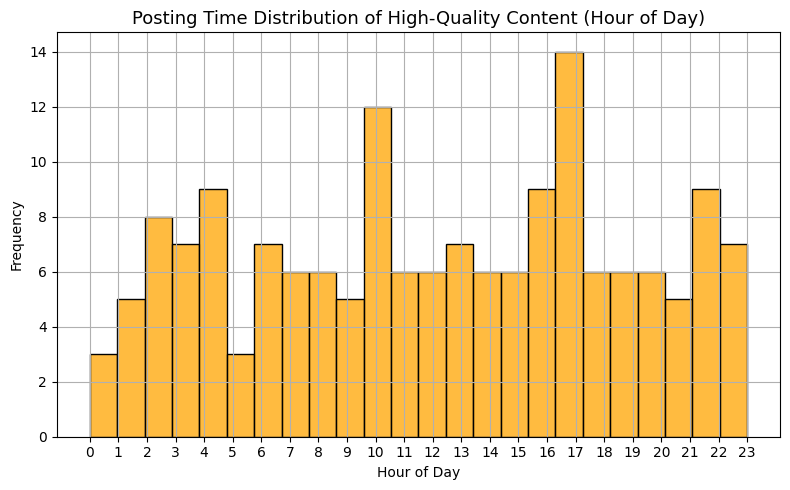

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of publishing time (hours)
plt.figure(figsize=(8, 5))
sns.histplot(df_high_quality['hour'], bins=24, kde=False, color='orange', edgecolor='black')
plt.title('Posting Time Distribution of High-Quality Content (Hour of Day)', fontsize=13)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

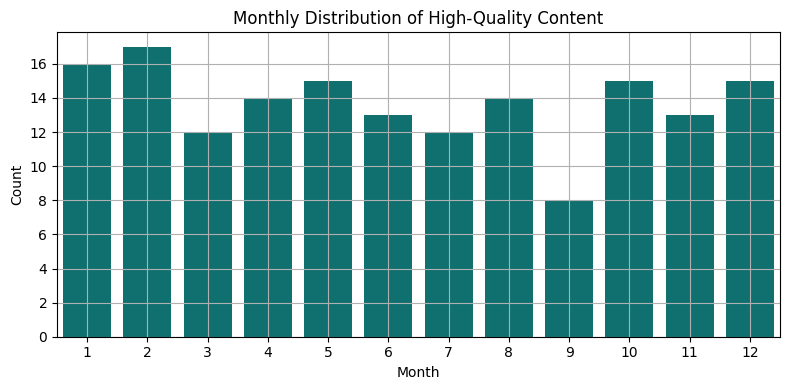

/tmp/ipython-input-30-215002080.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df_high_quality, palette='muted')


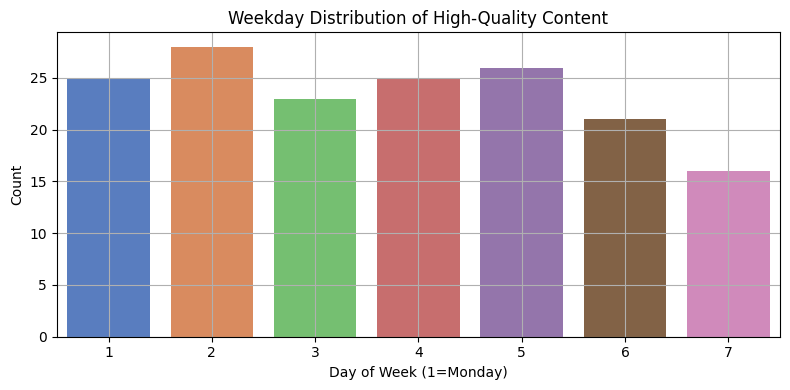

In [ ]:
# Monthly distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='month', data=df_high_quality, color='teal')
plt.title('Monthly Distribution of High-Quality Content')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Weekly distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='weekday', data=df_high_quality, palette='muted')
plt.title('Weekday Distribution of High-Quality Content')
plt.xlabel('Day of Week (1=Monday)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# See which keywords high-scoring content focuses on
df_high_quality['Content_Category'].value_counts()

,count
Content_Category,
veganism,36
technology,29
science,20
cooking,17
soccer,14
fitness,12
healthy eating,11
culture,9
public speaking,8


Content Quality, Drivers, and Replicability

* High-Quality Content Identification

  * Defined as items with ≥10 rating samples and an average score above the global mean + 0.5 SD.
  * Key categories include veganism, technology, science, and cooking, all showing low variance and consistent positive feedback.
  * These segments demonstrate stable quality with sustainable output potential, not driven solely by outlier “viral spikes.”
* Temporal Replicability Patterns
  * High-scoring content exhibits clear time-based clustering, suggesting strong replicability:
    * Daily hot zones: morning (6–7am, 9–11am), afternoon (4–5pm), and late evening (10–11pm).
    * Monthly peaks: January, February, December.
    * Weekly concentration: higher engagement on Mon, Tue, Fri, with relatively weaker performance on weekends.


## 2.3: High-Scoring Content Filtering

#### ：Q：Which content clusters show sustainable quality and are worth scaled re-investment?

In [ ]:
#Label the content (hot/average/low)
# Z-score of the mean score
global_mean = content_score_filtered['mean'].mean()
global_std = content_score_filtered['mean'].std()
content_score_filtered['z_score'] = (content_score_filtered['mean'] - global_mean) / global_std

# label
def tag_quality(z):
    if z > 1.0:
        return 'Hot'
    elif z > 0:
        return 'average'
    else:
        return 'low'

content_score_filtered['quality_tag'] = content_score_filtered['z_score'].apply(tag_quality)
content_score_filtered.head()



,Content ID,count,mean,std,z_score,quality_tag
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,46,43.760870,26.200242,0.714165,普通
2,01396602-c759-4a17-90f0-8f9b3ca11b30,40,32.575000,25.112963,-1.263906,低迷
3,019b61f4-926c-438e-adaf-6119c5eab752,13,34.923077,25.516209,-0.848680,低迷
5,01aff5ec-2aa8-412e-99ec-526f0f9a6d5e,43,45.162791,27.350398,0.962075,普通
6,02664d35-87cf-46a6-a80b-78fbc9ac8b2f,35,38.457143,25.057983,-0.223728,低迷


In [ ]:
# Cross-analysis of keywords: frequency + average score + fluctuation


# Add back the original classification information
df_score_with_category = content_score_filtered.merge(
    df[['Content ID', 'Content_Category']],
    on='Content ID',
    how='left'
)

df_high_z_score = df_score_with_category[df_score_with_category['z_score'] > 0]


#Group df_high_z_score by content-Category and calculate the count, mean, and std of the average of each category.
cross_summary = df_high_z_score.groupby('Content_Category')['mean'].agg(['count', 'mean', 'std']).reset_index()

cross_summary = cross_summary.rename(columns={
    'count': 'Freq', # Number of high-scoring content
    'mean': 'Avg_Score',
    'std': 'Volatility'
})


cross_summary

,Content_Category,Freq,Avg_Score,Volatility
0,animals,1037,42.913211,2.378814
1,cooking,730,43.093151,3.582151
2,culture,782,43.506394,2.826972
3,dogs,698,43.091691,2.511549
4,education,709,43.853315,2.886759
5,fitness,736,43.209239,3.508718
6,food,818,42.887531,2.585442
7,healthy eating,967,43.403309,3.470188
8,public speaking,736,43.353261,2.965032
9,science,961,42.875130,3.116959


In [ ]:
#Select keywords with "high frequency, high score, and low volatility" for your targeting group.
# Set thresholds
high_freq_thresh = cross_summary['Freq'].mean()
high_score_thresh = cross_summary['Avg_Score'].mean()
low_vol_thresh = cross_summary['Volatility'].mean()

# Meet the triple conditions: high frequency + high score + low volatility
recommended_keywords = cross_summary[
    (cross_summary['Freq'] > high_freq_thresh)  &
    (cross_summary['Avg_Score'] > high_score_thresh) &
    (cross_summary['Volatility'] < low_vol_thresh)
]
print("average Freq:",high_freq_thresh)
print("average Avg_Score:",high_score_thresh)
print("average volatityliy:",low_vol_thresh)
recommended_keywords


average Freq: 758.0625
average Avg_Score: 43.38053272591135
average volatityliy: 3.057084207598926


,Content_Category,Freq,Avg_Score,Volatility
2,culture,782,43.506394,2.826972


In [ ]:
#Identify "unstable viral keywords" and warn against replication.
# Condition: High score but high volatility (uncontrollable explosion)）
risky_keywords = cross_summary[
    (cross_summary['Freq'] > high_freq_thresh)  &
    (cross_summary['Avg_Score'] > high_score_thresh) &
    (cross_summary['Volatility'] > low_vol_thresh)
]

risky_keywords


,Content_Category,Freq,Avg_Score,Volatility
7,healthy eating,967,43.403309,3.470188
12,technology,814,45.142506,3.665386


Value Assessment
* Culture emerges as the only topic with stable, high scores and controllable, repeatable output — it shows consistent quality and is suitable for scaled investment.
* In contrast, Healthy Eating, Studying, Technology, and Veganism appear more like “illusions of value”: they generate occasional spikes but lack stability, making them volatile and unreliable for sustained replication.
